In [1]:
from ipynb.fs.full.Functions import *

# Exercise 2.3 A

In [2]:
# Parameters
M2amp  = 1                # Amplitude of M2 tide at seaward side.
discharge = 0             # Constant river discharge at landward boundary. 
Cd     = 2.5e-3           # Drag coefficient
deltaT = 30              # time step in seconds. Choose appropriate time step yourself based on Courant number. 
deltaX = 500             # spatial step in meters
Lbasin = 2e4           # Length of the basin or estuary in meters
Lb     = 4e4              # e-folding length scale for width.
B0     = 1e3              # Width of the basin in meters at seaward side.

In [3]:
# vary water depths, deepest and shallowest only!!
H = np.array([2, 10])
print(H)
# create simulations
sim_dict_list = []
for H0 in H:
    simulation_dict = simulation(deltaT=deltaT, deltaX=deltaX, Lbasin=Lbasin, Lb=Lb,
                                 B0=B0, H0=H0, M2amp=M2amp, discharge=discharge, Cd=Cd, constB=True)
    sim_dict_list.append(simulation_dict)

[ 2 10]


In [4]:
# harmfit to simulations
'''this takes like forever so don't run it if you dont have to'''
x = sim_dict_list[0]["Position"]
t = sim_dict_list[0]["Time"]


z_arr = np.empty(len(H), dtype=object)
for idx, simulation_dict in enumerate(sim_dict_list):
    z_arr[idx] = simulation_dict["Velocity"]
    
fit_dict_list = []

for idx, z in enumerate(z_arr):
    start = int(len(t) / 2)
    print(idx)
    dictionary = get_full_fit(x, t[start:], z[:,start:])
    fit_dict_list.append(dictionary)
    
shallowD = fit_dict_list[0]
wideD = fit_dict_list[1]

0


C:\Users\Lasse\Documents\Climate Physics\Morphodynamics Tidal systems\P2\Morphodynamics2\Functions.ipynb:206: RuntimeWarning: divide by zero encountered in true_divide
  "        t: time array of data to be fitted\n",
C:\Users\Lasse\Documents\Climate Physics\Morphodynamics Tidal systems\P2\Morphodynamics2\Functions.ipynb:222: RuntimeWarning: divide by zero encountered in true_divide
  "    Cn, Dn = np.split(par[1:], 2)\n",


1


# 2.3A 2: Deformation

In [5]:
# harmfit to simulations
'''this takes like forever so don't run it if you dont have to'''
x = sim_dict_list[0]["Position"]
t = sim_dict_list[0]["Time"]


z_arr = np.empty(len(H), dtype=object)
for idx, simulation_dict in enumerate(sim_dict_list):
    z_arr[idx] = simulation_dict["Water_level"]
    
fit_dict_list = []

for idx, z in enumerate(z_arr):
    start = int(len(t) / 2)
    print(idx)
    dictionary = get_full_fit(x, t[start:], z[:,start:])
    fit_dict_list.append(dictionary)
    
shallowD_WL = fit_dict_list[0]
wideD_WL = fit_dict_list[1]

0
1


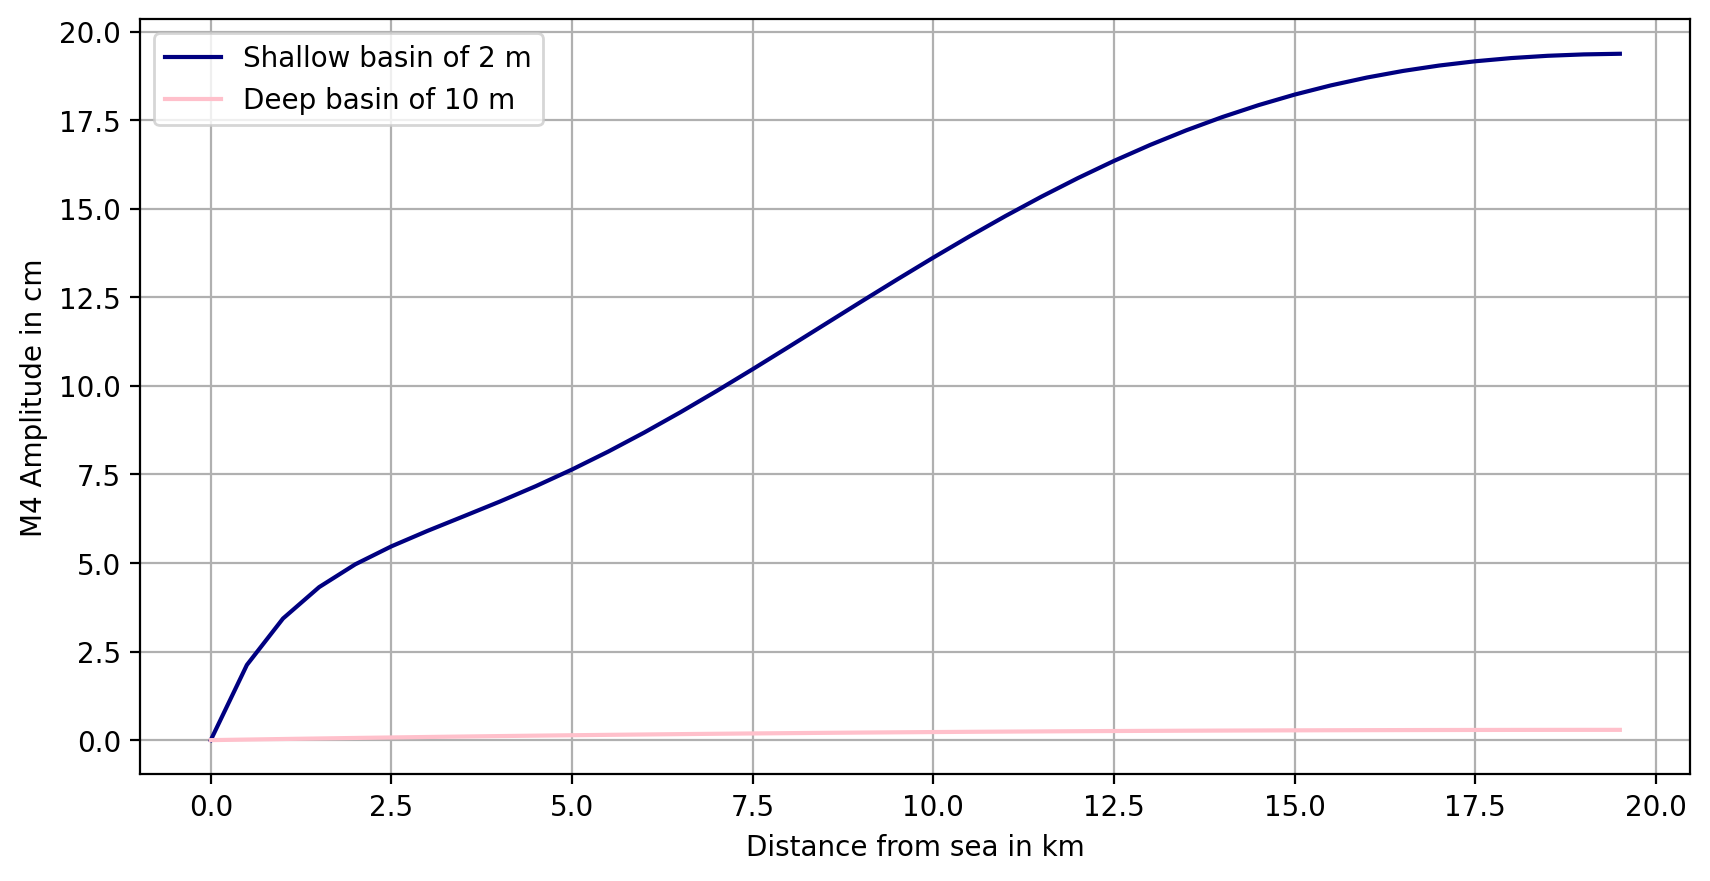

In [6]:
plt.plot(x[:-1]/1e3, 1e2*shallowD_WL['M4 Amplitude'], label='Shallow basin of 2 m', c='navy')
plt.plot(x[:-1]/1e3, 1e2*wideD_WL['M4 Amplitude'], label='Deep basin of 10 m',c='pink')
plt.ylabel('M4 Amplitude in cm')
plt.xlabel('Distance from sea in km')
plt.grid()
plt.legend()

## 2.3A 3. Phase difference

In [7]:






# plt.plot(t/3600,u_shallow[0], label='flow velocity in shallowest part')
# plt.xlabel('Time(h)')
# plt.ylabel('Flow velocity U (m/s)')
# plt.grid()

In [24]:
# harmfit to simulations
'''this takes like forever so don't run it if you dont have to'''
x = sim_dict_list[0]["Position"]
t = sim_dict_list[0]["Time"]


z_arr = np.empty(len(H), dtype=object)
for idx, simulation_dict in enumerate(sim_dict_list):
    z_arr[idx] = simulation_dict["Water_level"]
    
fit_dict_list = []

for idx, z in enumerate(z_arr):
    start = int(len(t) / 2)
    print(idx)
    dictionary = get_full_fit(x, t[start:], z[:,start:])
    fit_dict_list.append(dictionary)
    
shallowD = fit_dict_list[0]
wideD = fit_dict_list[1]

0
1


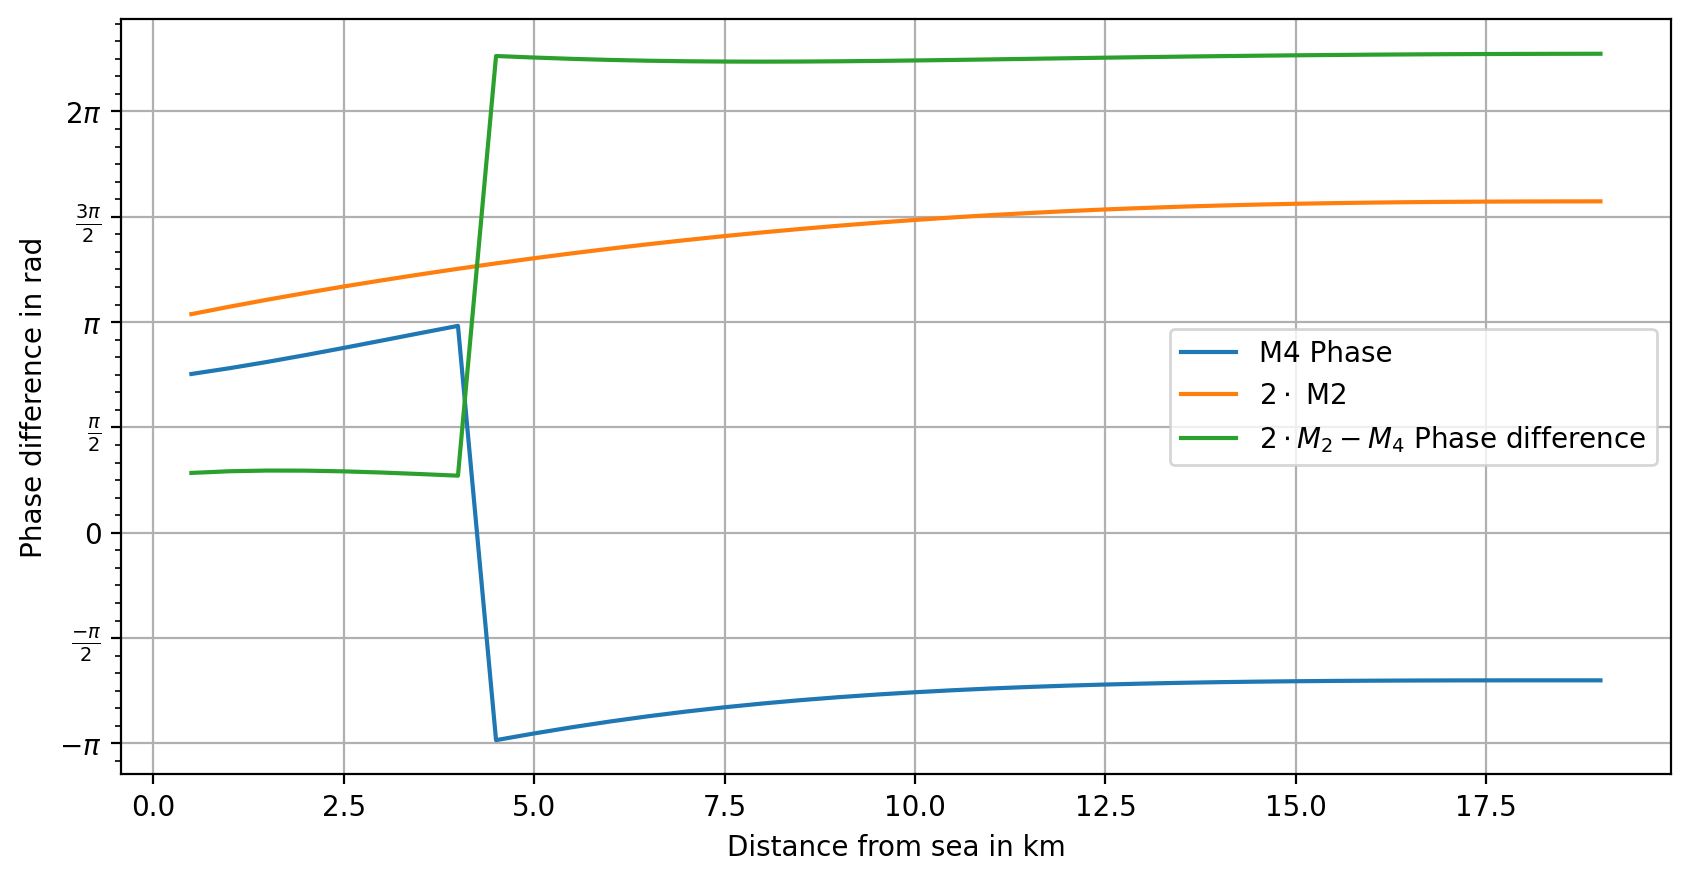

In [26]:
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

# plt.plot((shallowD["M4 Phase"]-shallowD["M2 Phase"]), label='phase differnce')
plt.plot(x[1:-2]/1e3,shallowD["M4 Phase"][1:-1],label="M4 Phase")       
plt.plot(x[1:-2]/1e3,2*shallowD["M2 Phase"][1:-1],label='$2 \cdot$ M2 ') 
plt.plot(x[1:-2]/1e3,2*shallowD["M2 Phase"][1:-1]-shallowD["M4 Phase"][1:-1],label='$2 \cdot M_2-M_4 $ Phase difference') 
ax = plt.gca()
ax.grid(True)
ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.ylabel('Phase difference in rad')
plt.xlabel('Distance from sea in km')
plt.ylim()
plt.legend()
plt.show()


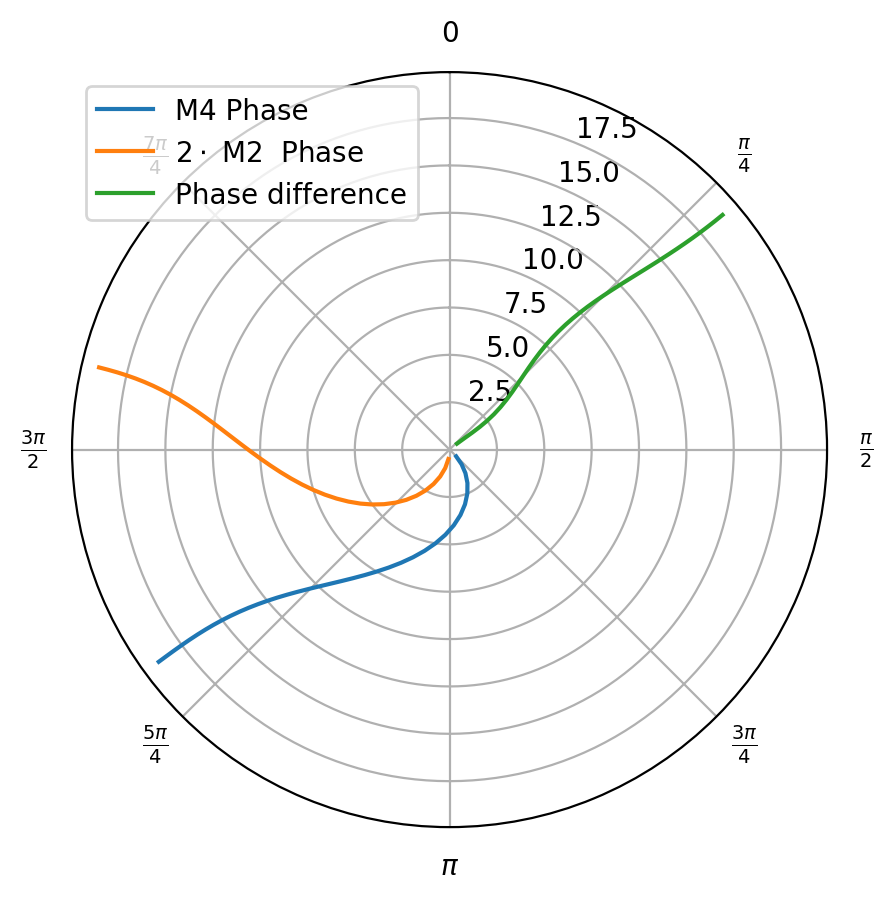

In [28]:
ax = plt.subplot(111, polar=True)
equals = np.linspace(0, 2*np.pi, 200)#, endpoint=False) #np.arange(24)



ax.plot(shallowD["M4 Phase"][1:-1],x[1:-2]/1e3,label="M4 Phase")       
ax.plot(2*shallowD["M2 Phase"][1:-1],x[1:-2]/1e3,label='$2 \cdot$ M2  Phase')   

# ax.plot(shallowD["M4 Phase"][1:-1]-shallowD["M2 Phase"][1:-1],x[1:-1]/1e3,label="Phase difference") 
ax.plot(2*shallowD["M2 Phase"][1:-1]-shallowD["M4 Phase"][1:-1],x[1:-2]/1e3,label="Phase difference") 
# ax.plot(2*shallowD["M2 Phase"][1:-1]-shallowD["M4 Phase"][1:-1],x[1:-1]/1e3,label="Phase difference 2M2 - m4") 
# ax.plot(,x[1:-1],label='M2 Phase')   

# Set the circumference labels
# ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
xT=plt.xticks()[0]
xL=['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',\
    r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$']
plt.xticks(xT, xL)


# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top

ax.set_theta_offset(np.pi/2.0)       
plt.legend(loc=2)
plt.show()

-2.687713564804704e-05


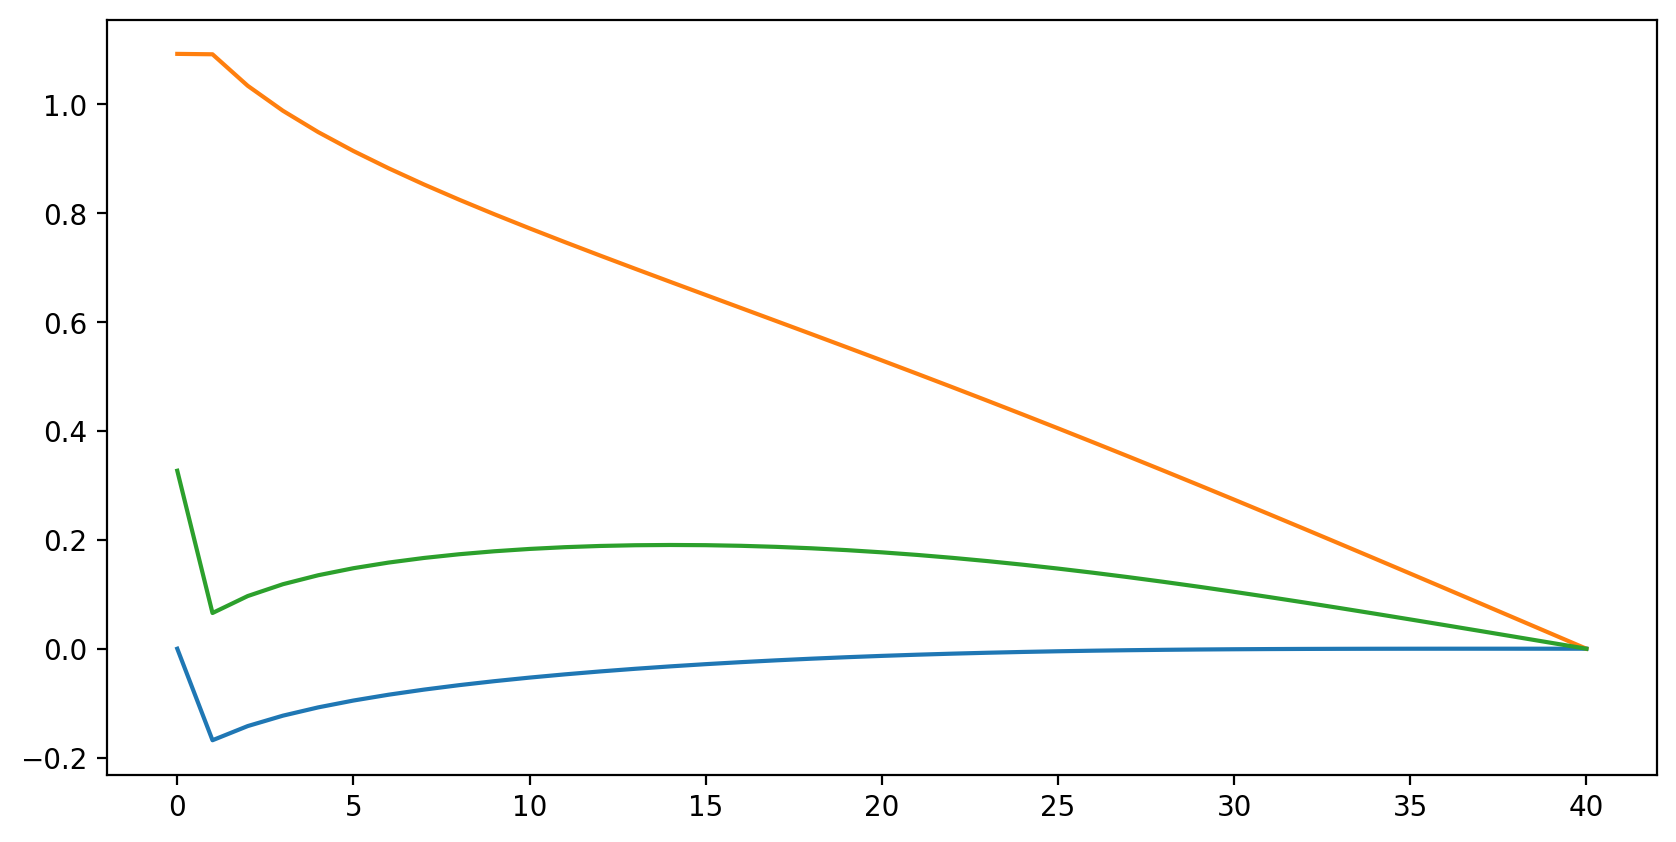

In [14]:
a0 = (shallowD['Mean Amplitude'])

m2s = shallowD["M2 Amplitude"]
m4s = shallowD["M4 Amplitude"]
plt.plot(a0)
print((np.average(z[0])))
plt.plot(m2s)
plt.plot(m4s)

In [13]:
print(z.shape)

(41, 14901)
